<a href="https://colab.research.google.com/github/omarbecerrasierra/MMA/blob/main/Parcial_Numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 2

## Factorización cholesky y LU


In [ ]:
from math import sqrt
import numpy as np

def LU_factorizacion(A):
    """"
    Generate the LU factorization of a matrix A
    return the matrix L and U in this order 
    """
    n = len(A)
    U = A.copy()
    L = np.eye(n)
    for k in range(n):
        for i in range(k+1, n):
            L[i,k] = U[i,k]/U[k,k]
            for j in range(k, n):
                U[i,j] = U[i,j] - L[i,k]*U[k,j]
    return L, U

def cholesky_factorizacion(A):
    """
    Performs a Cholesky decomposition of A,
    Returns the lower variant triangular matrix L.
    """
    n = len(A)
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            tmp_sum = 0
            for k in range(j):
                tmp_sum += L[i, k] * L[j, k]
            if (i != j): # Diagonal elements
                L[i, j] = (A[i, j] - tmp_sum)/L[j, j]
            else:
                L[i, j] = sqrt(A[i, i] - tmp_sum)
    return L

# Generación de la matriz aleatoria
A = np.random.rand(10, 10)
A = np.dot(A, A.T) # Para asegurar que A es simétrica positiva definida

# Factorización de Cholesky
LC = cholesky_factorizacion(A)

# Factorización LU
L, U = LU_factorizacion(A)
LU = np.dot(L, U)

# Comparación de resultados
print("Matriz original:\n", A)
print("Factorización de Cholesky:\n", np.dot(LC, np.transpose(LC)))
print("Factorización LU:\n", LU)

Matriz original:
 [[2.35039833 1.1674423  1.95082495 1.78776797 2.49327213 1.60477961
  1.32094882 2.25625485 2.60400301 1.65112047]
 [1.1674423  1.66925039 1.23360474 1.49295569 1.80868844 1.0575122
  1.25078432 1.91986654 2.00446666 1.55971676]
 [1.95082495 1.23360474 3.3576776  2.61075265 2.74237529 2.59343663
  1.83460613 1.98444823 3.14392449 2.60384985]
 [1.78776797 1.49295569 2.61075265 2.99349272 2.71984661 2.13596421
  1.66552549 2.21319753 3.03150677 2.31020028]
 [2.49327213 1.80868844 2.74237529 2.71984661 3.54937911 2.21993349
  1.81690729 2.79193795 3.5651508  2.60139787]
 [1.60477961 1.0575122  2.59343663 2.13596421 2.21993349 2.41806038
  1.67395757 2.05571206 2.38819071 1.94671274]
 [1.32094882 1.25078432 1.83460613 1.66552549 1.81690729 1.67395757
  1.65842187 1.96955274 2.34082668 1.67233533]
 [2.25625485 1.91986654 1.98444823 2.21319753 2.79193795 2.05571206
  1.96955274 3.53375005 3.11165457 1.80877015]
 [2.60400301 2.00446666 3.14392449 3.03150677 3.5651508  2.3881

## Comparación en Tiempo 

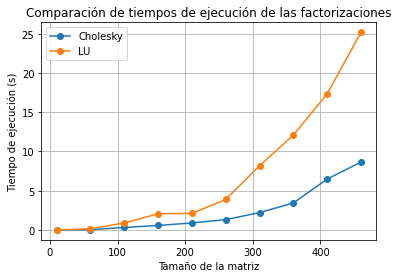

In [ ]:
# Comparación de resultados y ploting de los resultados

import numpy as np
import matplotlib.pyplot as plt
from time import time

sizes = np.arange(10, 500, 50)

tiempo_cholesky = []
tiempo_lu = []
for n in sizes:
    # Generación de la matriz aleatoria
    A = np.random.rand(n,n)
    A = np.dot(A, A.T) # Para asegurar que A es simétrica positiva definida

    # Factorización de Cholesky
    start = time()
    L = cholesky_factorizacion(A)
    end = time()
    t_cholesky = end - start
    tiempo_cholesky.append(t_cholesky)

    # Factorización LU
    start = time()
    L, U = LU_factorizacion(A)
    end = time()
    t_lu = end - start
    tiempo_lu.append(t_lu)

fig = plt.figure()
plt.plot(sizes, tiempo_cholesky, 'o-', label='Cholesky')
plt.plot(sizes, tiempo_lu, 'o-', label='LU')
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparación de tiempos de ejecución de las factorizaciones')
plt.legend()
plt.grid()
plt.show()
# save the figure
fig.savefig('comparacion_tiempo.png', dpi=300)


# Punto 3

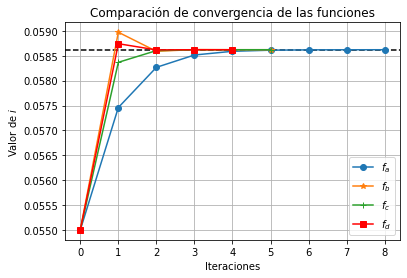

In [ ]:
import matplotlib.pyplot as plt

# Definición de los parametros
A = 0.9
r = 0.05
n = 20
i_guess = 0.055

def fa(i, v):
    return (1/A)*(r + (i - r)*(v**n))

def fb(i, v):
    return r*(1 - v**n)/(A - (v ** n))

def fc(i, v):

    return r  - (A - 1)*(i/(1 - v**n))

def fd(i, v):
    return (1/A)*(r + ((1 - A)*(v**n)*i/(1 - v**n)))

def succesive_approximation(f, i_guess, n, tol=1e-6):
    i = [i_guess]
    for k in range(n):
        v = 1/(1 + i[k])
        i.append(f(i[k], v))
        if abs(i[k+1] - i[k]) < tol:
            break
    return i

# Realizar la comparación de convergencia

fig = plt.figure()
plt.axhline(y=0.058621, color='k', linestyle='--')
plt.plot(succesive_approximation(fa, i_guess, 100), 'o-', label='$f_a$')
plt.plot(succesive_approximation(fb, i_guess, 100), '*-', label='$f_b$')
plt.plot(succesive_approximation(fc, i_guess, 100), '+-', label='$f_c$')
plt.plot(succesive_approximation(fd, i_guess, 100), 'rs-', label='$f_d$')
# show line of the value of i = 0.058621

plt.xlabel('Iteraciones')
plt.ylabel('Valor de $i$')
plt.title('Comparación de convergencia de las funciones')
plt.legend()
plt.grid()
plt.show()

# Punto 4

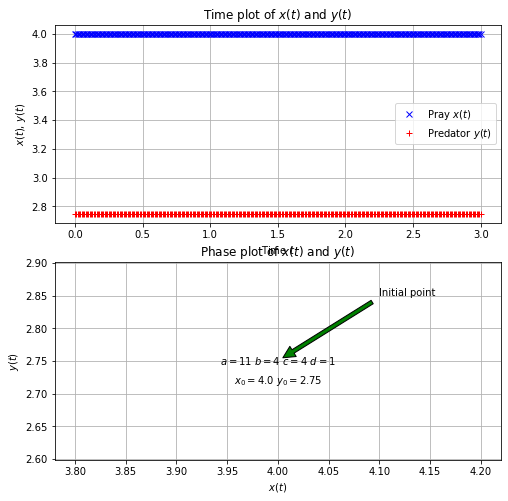

In [ ]:
# Aproximación de la solución de un sistema de ecuaciones diferenciales
import numpy as np
import matplotlib.pyplot as plt

# Parametros
a, b, c, d = 11, 4, 4, 1

# Condición inicial
x_0, y_0 = c/d, a/b
w0 = np.array([x_0, y_0])

# Paso de integración y tiempo final
h = 0.01
t_0 = 0
t_n = 3
n = int((t_n - t_0)/h)

# Sistema de ecuaciones diferenciales Lokta-Volterra
def f(t, W):
    return np.array([W[0]*(a - b*W[1]), W[1]*(-c + d*W[0])])

# Metodo de Runge-Kutta 4th order
def runge_kutta_4th_order(f, t0, z0, h, n):
    t = np.array([t0])
    z = np.array([z0])
    for i in range(n):
        k1 = f(t[i], z[i])
        k2 = f(t[i] + h/2, z[i] + h*k1/2)
        k3 = f(t[i] + h/2, z[i] + h*k2/2)
        k4 = f(t[i] + h, z[i] + h*k3)
        z = np.append(z, [z[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6], axis = 0)
        t = np.append(t, [t[i] + h])
    return t, z

# Solución
t, z = runge_kutta_4th_order(f, t_0, w0, h, n)

##############
# Gráficas
##############

x_r = z[:, 0]
y_r = z[:, 1]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(t, x_r, 'xb')
ax1.plot(t, y_r, '+r')
ax1.legend([ 'Pray $x(t)$', 'Predator $y(t)$'])
ax1.grid()
ax1.set_xlabel('Time $t$')
ax1.set_ylabel('$x(t)$, $y(t)$')
ax1.set_title('Time plot of $x(t)$ and $y(t)$')
ax2.plot(x_r, y_r, '-')
ax2.grid()
ax2.set_xlabel('$x(t)$')
ax2.set_ylabel('$y(t)$')
ax2.set_title('Phase plot of $x(t)$ and $y(t)$')
ax2.annotate('Initial point', xy=(x_0, y_0), xytext=(x_0 + 0.1, y_0 + 0.1), arrowprops=dict(facecolor='green', shrink=0.05))
ax2.text(0.5, 0.5, '$a = $' + str(a) + ' $b = $' + str(b) + ' $c = $' + str(c) + ' $d = $' + str(d), horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
ax2.text(0.5, 0.4, '$x_0 = $' + str(x_0) + ' $y_0 = $' + str(y_0), horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
plt.show()